In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import missingno as msno
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot, prediction_error

# Notebook de nettoyage

In [3]:
df_2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [5]:
df_2015["OSEBuildingID"].value_counts()

24688    1
20987    1
661      1
657      1
23182    1
        ..
21732    1
19679    1
25822    1
24600    1
8        1
Name: OSEBuildingID, Length: 3340, dtype: int64

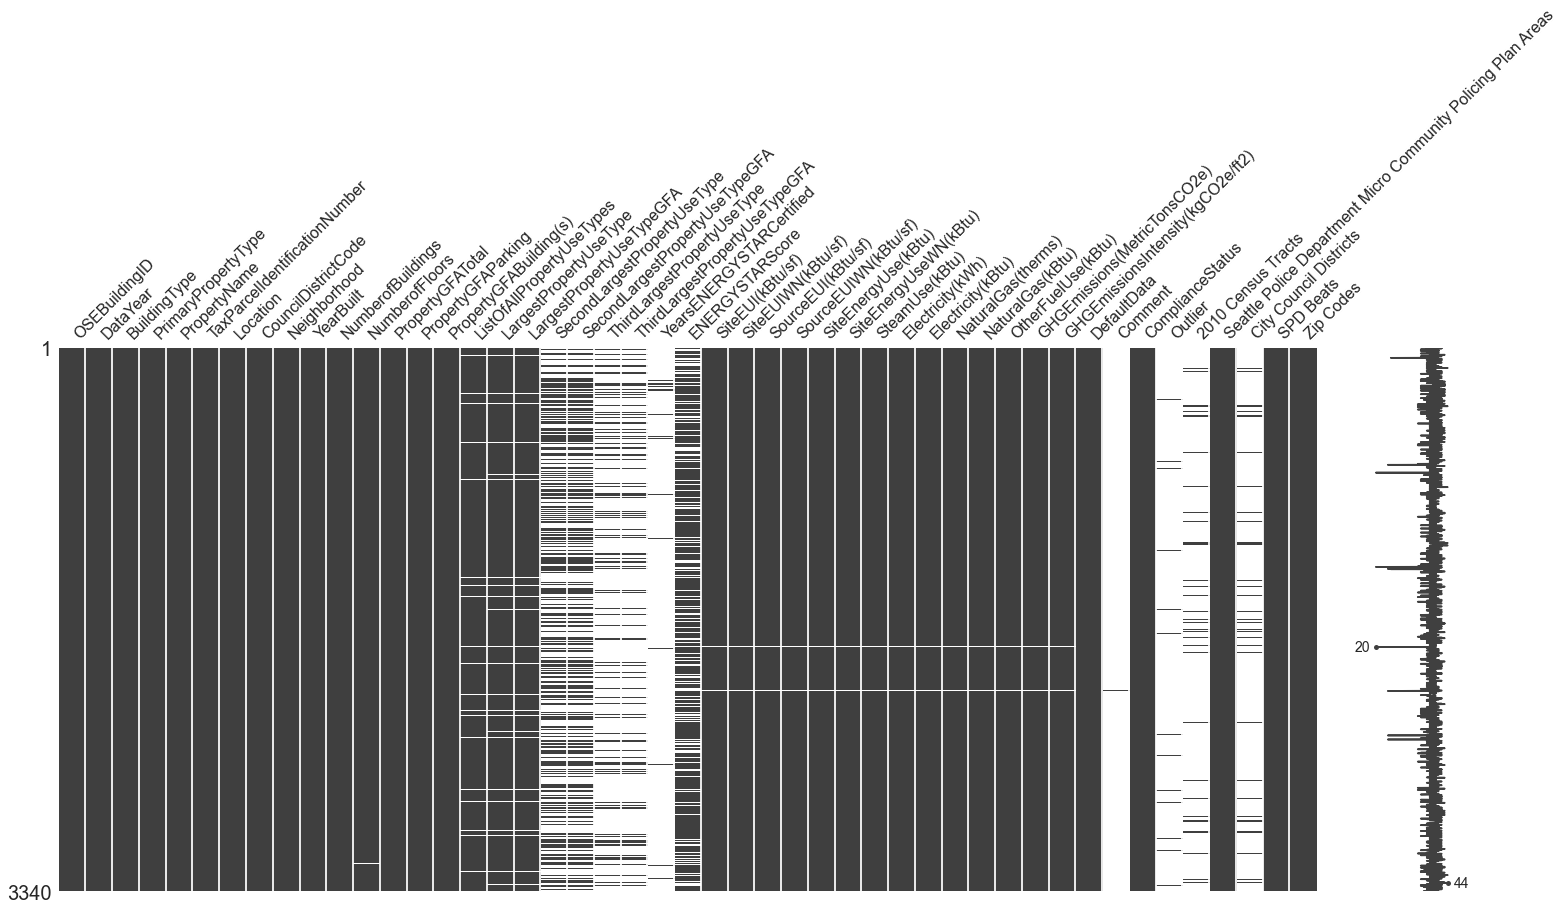

In [6]:
#Recherche des N/A
msno.matrix(df_2015);

In [7]:
df_2015 = df_2015.loc[:, df_2015.isnull().mean() <0.6]

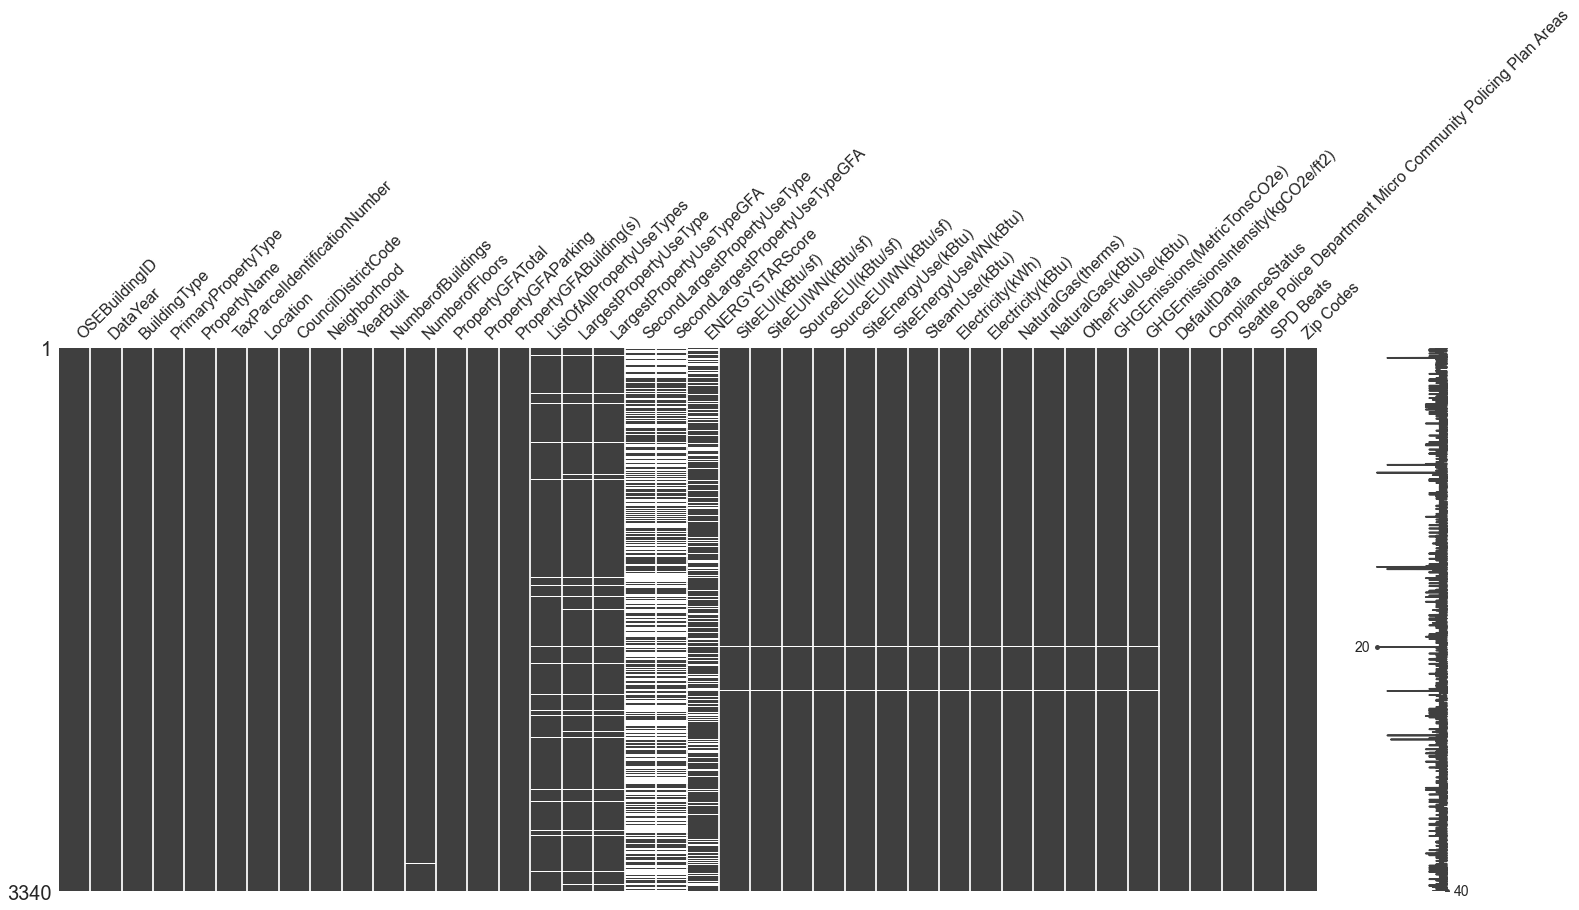

In [8]:
msno.matrix(df_2015);

In [9]:
df_2016 = pd.read_csv('2016-building-energy-benchmarking.csv')
df_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [10]:
df_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

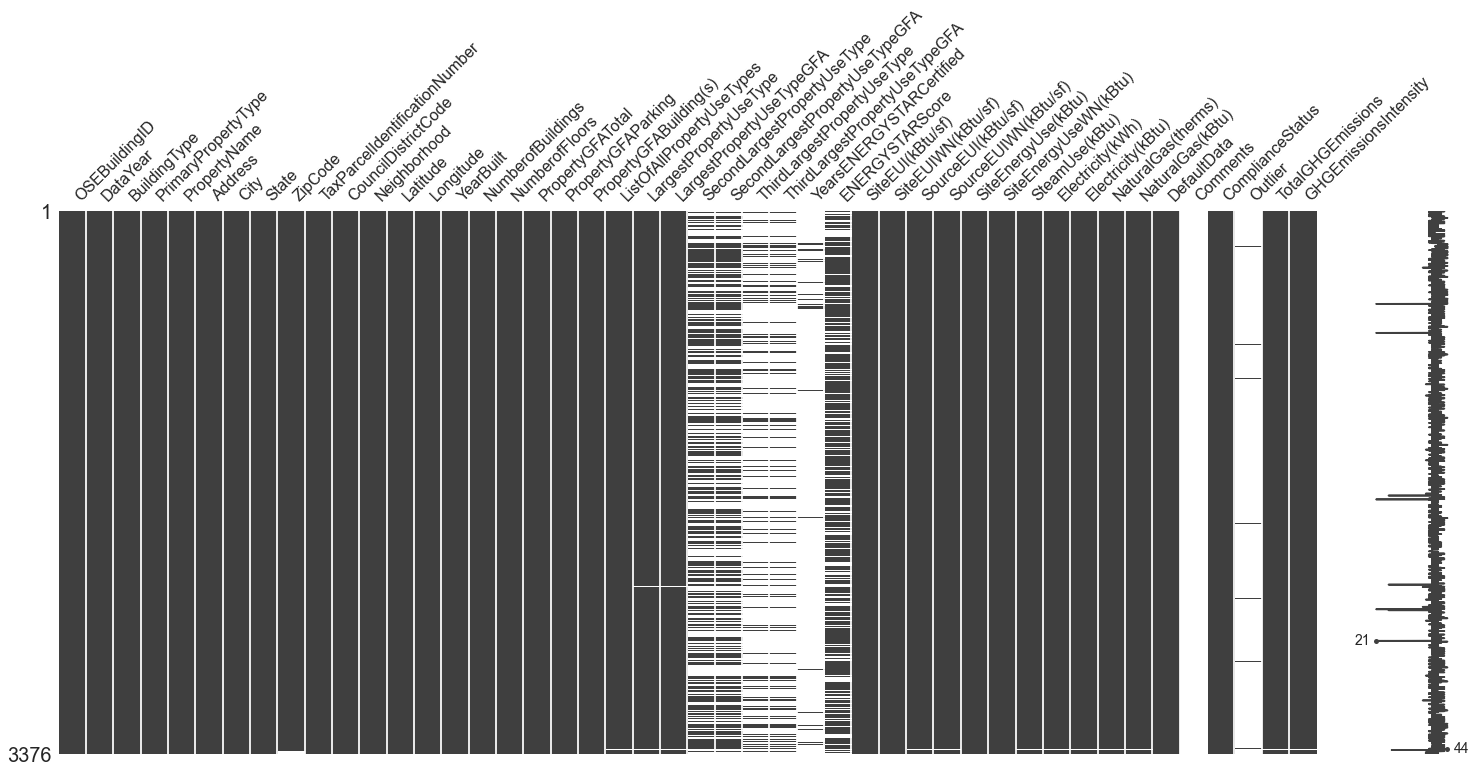

In [11]:
msno.matrix(df_2016);

In [12]:
df_2016 = df_2016.loc[:, df_2016.isnull().mean() <0.6]

In [13]:
df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                        "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity",
                        "Zip Codes" : "ZipCode"}, inplace=True)

In [14]:
coordonnees = df_2016[["OSEBuildingID", "Latitude", "Longitude"]]
df_2015 = df_2015.merge(coordonnees, on="OSEBuildingID")

In [15]:
df_2016['PropertyName'] = df_2016["PropertyName"].str.lower()
df_2016['Neighborhood'] = df_2016["Neighborhood"].str.lower()
df_2015['PropertyName'] = df_2015["PropertyName"].str.lower()
df_2015['Neighborhood'] = df_2015["Neighborhood"].str.lower()

In [16]:
df = pd.concat([df_2015,df_2016], join="outer", ignore_index=True, verify_integrity=True)
df.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
6655,50222,2016,Nonresidential COS,Office,horticulture building,1624049080,NaN,2,greater duwamish,1990,...,True,Error - Correct Default Data,NaN,NaN,NaN,47.56722,-122.31154,1600 S Dakota St,Seattle,WA
6656,50223,2016,Nonresidential COS,Other,international district/chinatown cc,3558300000,NaN,2,downtown,2004,...,False,Compliant,NaN,NaN,NaN,47.59625,-122.32283,719 8th Ave S,Seattle,WA
6657,50224,2016,Nonresidential COS,Other,queen anne pool,1794501150,NaN,7,magnolia / queen anne,1974,...,False,Compliant,NaN,NaN,NaN,47.63644,-122.35784,1920 1st Ave W,Seattle,WA
6658,50225,2016,Nonresidential COS,Mixed Use Property,south park community center,7883603155,NaN,1,greater duwamish,1989,...,False,Compliant,NaN,NaN,NaN,47.52832,-122.32431,8319 8th Ave S,Seattle,WA
6659,50226,2016,Nonresidential COS,Mixed Use Property,van asselt community center,7857002030,NaN,2,greater duwamish,1938,...,False,Compliant,NaN,NaN,NaN,47.53939,-122.29536,2820 S Myrtle St,Seattle,WA


In [17]:
dff = df_2016

In [18]:
dff.fillna(value=df_2015, inplace=True)

In [19]:
df = pd.concat([df_2015[~ df_2015["OSEBuildingID"].isin(dff["OSEBuildingID"])],
                dff], join="outer", ignore_index=True, verify_integrity=True)
df.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,DefaultData,ComplianceStatus,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
3371,50222,2016,Nonresidential COS,Office,horticulture building,1624049080,NaN,2,greater duwamish,1990,...,True,Error - Correct Default Data,NaN,NaN,NaN,47.56722,-122.31154,1600 S Dakota St,Seattle,WA
3372,50223,2016,Nonresidential COS,Other,international district/chinatown cc,3558300000,NaN,2,downtown,2004,...,False,Compliant,NaN,NaN,NaN,47.59625,-122.32283,719 8th Ave S,Seattle,WA
3373,50224,2016,Nonresidential COS,Other,queen anne pool,1794501150,NaN,7,magnolia / queen anne,1974,...,False,Compliant,NaN,NaN,NaN,47.63644,-122.35784,1920 1st Ave W,Seattle,WA
3374,50225,2016,Nonresidential COS,Mixed Use Property,south park community center,7883603155,NaN,1,greater duwamish,1989,...,False,Compliant,NaN,NaN,NaN,47.52832,-122.32431,8319 8th Ave S,Seattle,WA
3375,50226,2016,Nonresidential COS,Mixed Use Property,van asselt community center,7857002030,NaN,2,greater duwamish,1938,...,False,Compliant,NaN,NaN,NaN,47.53939,-122.29536,2820 S Myrtle St,Seattle,WA


In [20]:
df.shape

(3376, 45)

In [21]:
dff.shape

(3376, 41)

In [22]:
#df = df.loc[:, df_2015.isnull().mean() <0.6]

In [23]:
df_2015.shape

(3284, 42)

In [24]:
df.columns 

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData', 'ComplianceStatus',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'SPD Beats', 'ZipCode', 'Latitud

In [25]:
df['PropertyGFABuilding(s)'].value_counts()

36000    9
25920    8
21600    7
28800    7
24000    6
        ..
66994    1
30287    1
66990    1
69035    1
53250    1
Name: PropertyGFABuilding(s), Length: 3193, dtype: int64

In [26]:
df['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Laboratory                      10
Hospital                        10
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [27]:
df['PropertyName'].value_counts()

northgate plaza           3
centennial building       2
south park                2
central park              2
crestview apartments      2
                         ..
greenus building          1
the bernard               1
rollin street flats       1
sccc district/erickson    1
lakeside west             1
Name: PropertyName, Length: 3360, dtype: int64

In [28]:
df['Neighborhood'].value_counts()

downtown                  573
east                      453
magnolia / queen anne     423
greater duwamish          375
northeast                 280
lake union                251
northwest                 221
north                     187
southwest                 166
central                   134
ballard                   133
southeast                  95
delridge                   84
delridge neighborhoods      1
Name: Neighborhood, dtype: int64

In [29]:
df['LargestPropertyUseType'].value_counts()

Multifamily Housing                                     1677
Office                                                   502
Non-Refrigerated Warehouse                               199
K-12 School                                              139
Other                                                    102
Retail Store                                             100
Hotel                                                     77
Worship Facility                                          72
Distribution Center                                       54
Senior Care Community                                     46
Medical Office                                            41
Supermarket/Grocery Store                                 41
Parking                                                   32
Other - Recreation                                        31
Self-Storage Facility                                     28
College/University                                        26
Residence Hall/Dormitory

In [30]:
dff.dropna(subset=['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'],inplace=True)

In [31]:
df.columns 

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData', 'ComplianceStatus',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'SPD Beats', 'ZipCode', 'Latitud

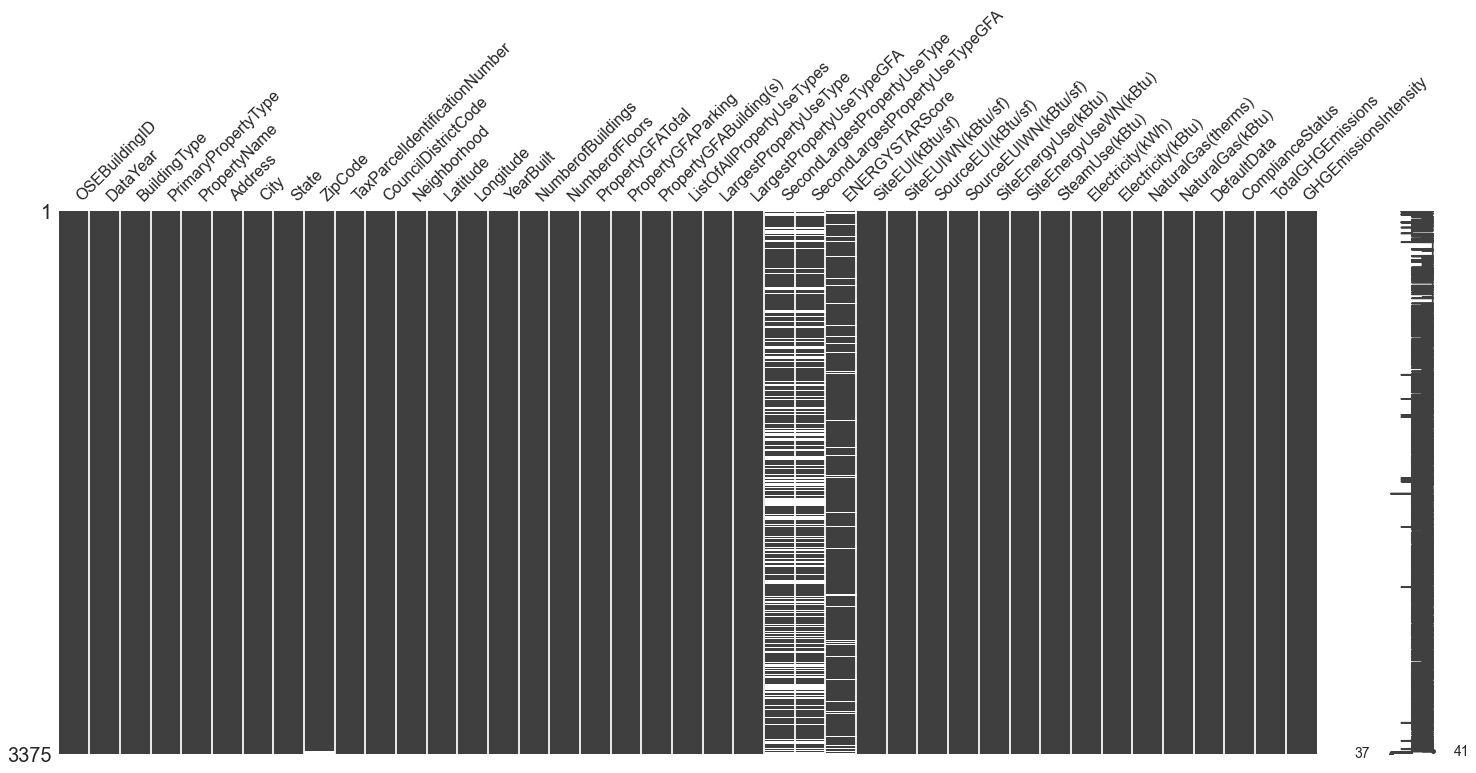

In [32]:
msno.matrix(dff);

In [33]:
df.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,ZipCode,Latitude,Longitude
count,3376.000000,3376.0,3376.000000,3376.000000,3376.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.374000e+03,...,3.375000e+03,3.375000e+03,0.0,3375.000000,3375.000000,0.0,0.0,3360.000000,3376.000000,3376.000000
mean,21208.991114,2016.0,4.439277,1968.573164,1.106635,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.944438e+04,...,1.366161e+04,1.366161e+06,NaN,119.530696,1.175218,NaN,NaN,98116.949107,47.624033,-122.334795
std,12223.757015,0.0,2.120625,33.088156,2.105908,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.031663e+05,...,6.702077e+04,6.702077e+06,NaN,538.210707,1.820153,NaN,NaN,18.615205,0.047758,0.027203
min,1.000000,2016.0,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,...,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000,NaN,NaN,98006.000000,47.499170,-122.414250
25%,19990.750000,2016.0,3.000000,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.506100e+04,...,0.000000e+00,0.000000e+00,NaN,9.485000,0.210000,NaN,NaN,98105.000000,47.599860,-122.350662
50%,23112.000000,2016.0,4.000000,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.987450e+04,...,3.214970e+03,3.214970e+05,NaN,33.920000,0.610000,NaN,NaN,98115.000000,47.618675,-122.332495
75%,25994.250000,2016.0,7.000000,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.559500e+04,...,1.188072e+04,1.188072e+06,NaN,93.850000,1.370000,NaN,NaN,98122.000000,47.657115,-122.319407
max,50226.000000,2016.0,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,...,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000,NaN,NaN,98272.000000,47.733870,-122.220966


In [34]:
df_resume = pd.DataFrame(df, columns=['OSEBuildingID','TotalGHGEmissions','SiteEnergyUse(kBtu)','GHGEmissionsIntensity','PropertyGFATotal','Electricity(kBtu)'])
df_resume.describe()

,OSEBuildingID,TotalGHGEmissions,SiteEnergyUse(kBtu),GHGEmissionsIntensity,PropertyGFATotal,Electricity(kBtu)
count,3376.000000,3375.000000,3.376000e+03,3375.000000,3.376000e+03,3.375000e+03
mean,21208.991114,119.530696,5.398428e+06,1.175218,9.483354e+04,3.702236e+06
std,12223.757015,538.210707,2.159512e+07,1.820153,2.188376e+05,1.483358e+07
min,1.000000,-0.800000,0.000000e+00,-0.020000,1.128500e+04,-1.154170e+05
25%,19990.750000,9.485000,9.243768e+05,0.210000,2.848700e+04,6.396350e+05
50%,23112.000000,33.920000,1.803279e+06,0.610000,4.417500e+04,1.175756e+06
75%,25994.250000,93.850000,4.221247e+06,1.370000,9.099200e+04,2.826344e+06
max,50226.000000,16870.980000,8.739237e+08,34.090000,9.320156e+06,6.570744e+08


In [35]:
#Suppression des valeurs aberrantes remarquées à partir du tableau describe.

df = df.loc[df['Electricity(kBtu)'] > 0]
df = df.loc[df["TotalGHGEmissions"] > 0]
df = df.loc[df["GHGEmissionsIntensity"] > 0]
df = df.loc[df["PropertyGFATotal"] > 0]
df = df.loc[df["SiteEnergyUse(kBtu)"] > 0]

In [36]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData', 'ComplianceStatus',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'SPD Beats', 'ZipCode', 'Latitud

In [37]:
#Harmonisation des caractères, noms, catégories, etc

char_correction = {"Distribution Center\n" : "Distribution Center",
                   "Self-Storage Facility\n" : "Self-Storage Facility",
                   "Restaurant\n" : "Restaurant",
                   "Supermarket / Grocery Store": "Supermarket/Grocery Store",
                   "Residence Hall/Dormitory" : "Residence Hall"}

for key, value in char_correction.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [38]:
neighborhood_correction = {"Delridge neighborhoods": "Delridge"}

for key, value in neighborhood_correction.items():
    df["Neighborhood"].loc[df["Neighborhood"].str.contains(key, case=False, regex=False)] = value

In [39]:
df.drop(["PropertyName", "LargestPropertyUseTypeGFA", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)",
         "SiteEnergyUseWN(kBtu)", "Electricity(kWh)", "NaturalGas(therms)", "TaxParcelIdentificationNumber", "Location", "CouncilDistrictCode",
         "ListOfAllPropertyUseTypes", "LargestPropertyUseType", "DataYear", "OtherFuelUse(kBtu)",
         "DefaultData", "ComplianceStatus", "State",
         "Seattle Police Department Micro Community Policing Plan Areas", "SPD Beats", "ZipCode"], axis=1, inplace=True)

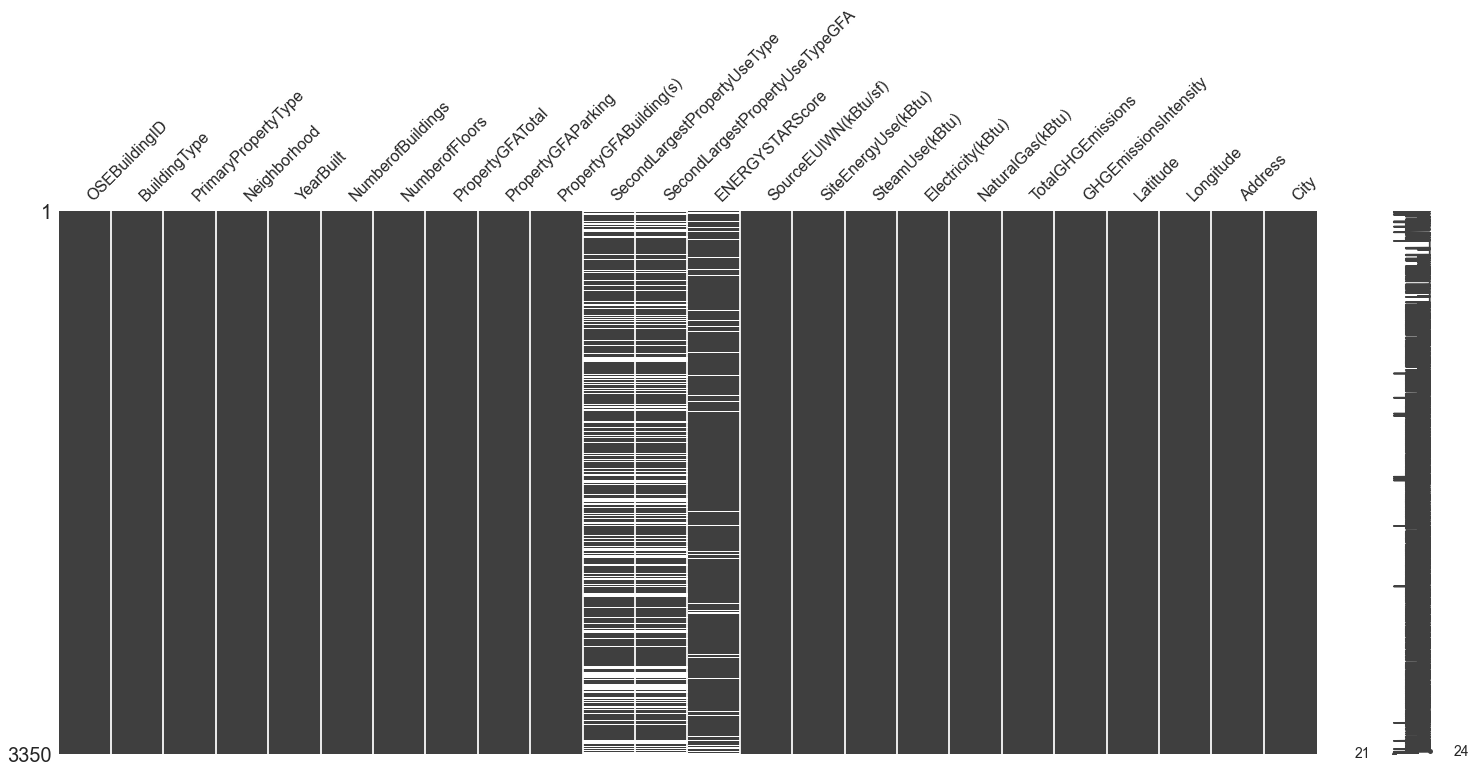

In [40]:
msno.matrix(df);

In [41]:
df["SecondLargestPropertyUseType"].fillna(value="None", inplace=True)

In [42]:
property_type = {"College/University" : "University",
                "SPS-District K-12" : "K-12 School",
                "Small- and Mid-Sized Office" : "Office",
                 "Large Office" : "Office", 
                 "Medical Office" : "Office",
                 "Refrigerated Warehouse" : "Warehouse",
                 "Non-Refrigerated Warehouse" : "Warehouse",
                 "Self-Storage Facility" : "Warehouse",
                 "Supermarket/Grocery" : "Supermarket/Store",
                 "Retail Store" : "Supermarket/Store",
                "Residence Hall/Dormitory" : "Residence Hall"}

for key, value in property_type.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value
for key, value in property_type.items():
    df['SecondLargestPropertyUseType'].loc[df["SecondLargestPropertyUseType"].str.contains(key, case=False, regex=False)] = value

In [43]:
#Observation rapide de l'évolution de la quantité d'énergie consommée

energyuse_2015 = df["SiteEnergyUse(kBtu)"].loc[(df["DataYear"] == 2015)].mean()
energyuse_2016 = df["SiteEnergyUse(kBtu)"].loc[(df["DataYear"] == 2016)].mean()
diff_energy = energyuse_2016 - energyuse_2015

print("Consommation d'énergie en 2015: " + str(energyuse_2015) + " kBtu")
print("Consommation d'énergie en 2016: " + str(energyuse_2016) + " kBtu")
print("Différence de consommation entre 2015 et 2016: " + str(diff_energy) + " kBtu")
print(f"Différence de consommation entre 2015 et 2016: {diff_energy:.2f} kBtu")

KeyError: 'DataYear'

In [ ]:
#Observation rapide de l'évolution des émissions de CO2

co2_2015 = df["TotalGHGEmissions"].loc[(df["DataYear"] == 2015)].mean()
co2_2016 = df["TotalGHGEmissions"].loc[(df["DataYear"] == 2016)].mean()
diff_co2 = co2_2016 - co2_2015


print("Emissions de CO2 en 2015: " + str(co2_2015) + " MetricTonsCO2e")
print("Emissions de CO2 en 2016: " + str(co2_2016) + " MetricTonsCO2e")
print("Différence de consommation entre 2015 et 2016: " + str(diff_co2) + " MetricTonsCO2e")

In [ ]:
#Création d'une variable âge du bâtiment.

df["Age"] = df["DataYear"] - df["YearBuilt"]

In [ ]:
df = df.reset_index()

In [ ]:
#Variable "Has a Parking"

def HasParking(row):
    if row["PropertyGFAParking"] <= 0:
        val="No"
    else:
        val="Yes"
    return val

df['HasParking'] = df.apply(HasParking, axis=1)

In [ ]:
#Nous tenterons ici de répartir les bâtiments en clusters, aidés de la méthode KMeans Clustering

scaler = StandardScaler()
X = np.abs(df[["Latitude", "Longitude"]])
X_scaled = scaler.fit_transform(X)

model = KMeans()
visualizer = KElbowVisualizer(model, k =(2, 10))
visualizer.fit(X_scaled)
visualizer.show();

In [ ]:
#Après plusieurs tentatives, nous garderons un nombre de 5 clusters 
#L'analyse nous montrera qu'il serait utile d'étendre ce nombre

kmeans = KMeans(n_clusters=5)

kmeans.fit(X_scaled)
pred = kmeans.predict(X_scaled)

clusters = pd.DataFrame(pred, index=df["OSEBuildingID"]).reset_index()
clusters.columns = ["OSEBuildingID", "Clusters"]
df = pd.merge(df, clusters, on="OSEBuildingID")
df.drop_duplicates(inplace=True)
df

In [ ]:
df.columns

In [ ]:
import matplotlib.image as mpimg
seattle_img=mpimg.imread('Map_Seattle.jpg')
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 0.8, c="SiteEnergyUse(kBtu)", colorbar=True, cmap=plt.get_cmap("coolwarm"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.6)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation et consommation énergétique")
plt.savefig("Seattle_energy.png")

plt.show()

In [ ]:
df["Clusters"] = df["Clusters"].astype("int64")

In [ ]:

seattle_img=mpimg.imread('Map_Seattle.jpg')
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 1, c="Clusters", colorbar=False, cmap=plt.get_cmap("bone"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.4)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation des clusters")
plt.savefig("Seattle_clusters.png")

plt.show()

In [ ]:
#Séparation des variables en variables catégorielles et numériques

cat_var = ["PrimaryPropertyType", "SecondLargestPropertyUseType","Clusters", 'HasParking']

num_var = ["Age","PropertyGFATotal", "SecondLargestPropertyUseTypeGFA","NumberofFloors", "NumberofBuildings"]


In [ ]:
# Analyses univariées, utilisées pour observer et se faire une idée initiale des niveaux de consommation, 
#d'émission et de répartition à travers les bâtiments de la ville

for cols in cat_var:
    sns.countplot(y=cols, data=df, order=df[cols].value_counts().index)
    plt.title(cols)
    plt.show()

In [ ]:
for cols in num_var:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

In [ ]:
for cols in num_var:
    sns.boxplot(x=cols, data=df)
    plt.title(cols)
    plt.show()

In [ ]:
df.columns

In [ ]:
#Nous tentons ici un test, peu concluant, avec une méthode de régression
model = LinearRegression()


In [ ]:
#y_pred0 = model.predict(df[['Age','SurfaceLog']])

In [ ]:
#L'allure générale de la courbe est peu satisfaisante, et nous pousse à aller plus loin
#plt.plot(np.log(df['SiteEnergyUse(kBtu)']), y_pred0, "o")

In [ ]:
for cols in num_var:
    sns.displot(x=cols,data=df)
    plt.title(cols)
    plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False)

In [ ]:
matrix = df.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(matrix, square=True, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

In [ ]:
matrix['SiteEnergyUse(kBtu)'].sort_values(ascending=False)

#### Corrélation forte avec superficie des propriétés et le nombre de bâtiments ET conso d'énergie

In [ ]:
matrix['TotalGHGEmissions'].sort_values(ascending=False)

In [ ]:
matrix['ENERGYSTARScore'].sort_values(ascending=False)

#### Corrélation "moyenne" avec superficie des propriétés et le nombre de bâtiments ET émissions de gaz a effet de serre 